In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from scipy.stats import ttest_ind


In [45]:
dataset_original =  pd.read_csv("../datos/competencia_03.csv.gz")

In [52]:
#dataset = dataset_original.copy()
dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
dataset = dataset_baseline.copy()

In [53]:
dataset['foto_mes'].unique()

array([201906, 201907, 201909, 201910, 201903, 201905, 201908, 201904,
       202107], dtype=int64)

In [54]:
dataset.set_index('foto_mes', inplace=True)

In [55]:
df_roto_zero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null.columns[df_roto_zero_null.eq(100).any()]].stack().reset_index()
df_roto_zero_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [56]:
df_roto_zero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero = df_roto_zero_bruto[df_roto_zero_bruto.columns[df_roto_zero_bruto.eq(100).any()]].stack().reset_index()
df_roto_zero.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero = df_roto_zero[df_roto_zero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [57]:
df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
df_roto_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

C:\Users\maico\AppData\Local\Temp\ipykernel_44328\2256541971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')


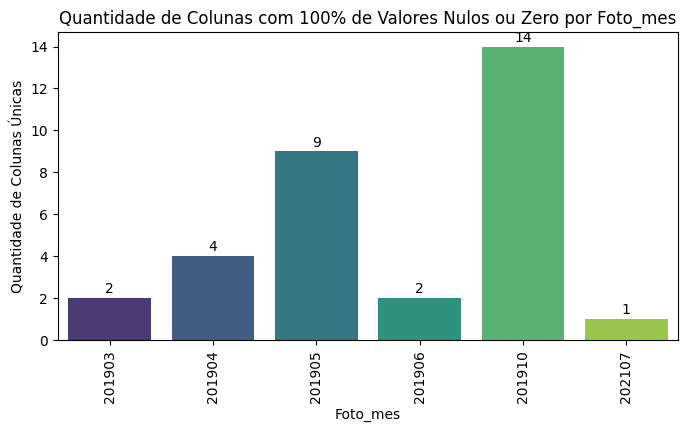

In [58]:
count_df_roto_zero_null = df_roto_zero_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Nulos ou Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_44328\3315999687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')


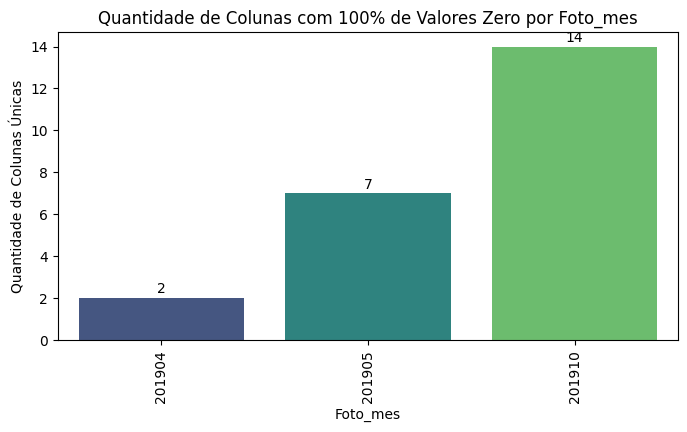

In [59]:
count_df_roto_zero = df_roto_zero.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_44328\1015547022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')


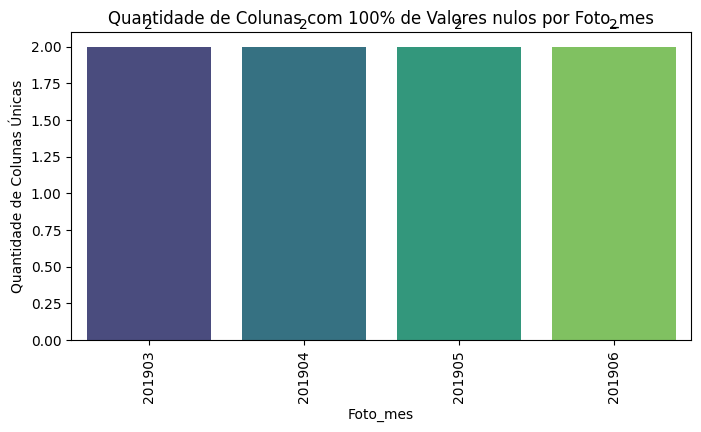

In [64]:
count_df_roto_null = df_roto_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [65]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

merged_df = pd.merge(count_df_roto_zero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_zero', '_null'))
merged_df = merged_df.fillna(0)
merged_df['quantidade_colunas'] =  merged_df['quantidade_colunas_zero'] - merged_df['quantidade_colunas_null']


C:\Users\maico\AppData\Local\Temp\ipykernel_44328\2532655015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')


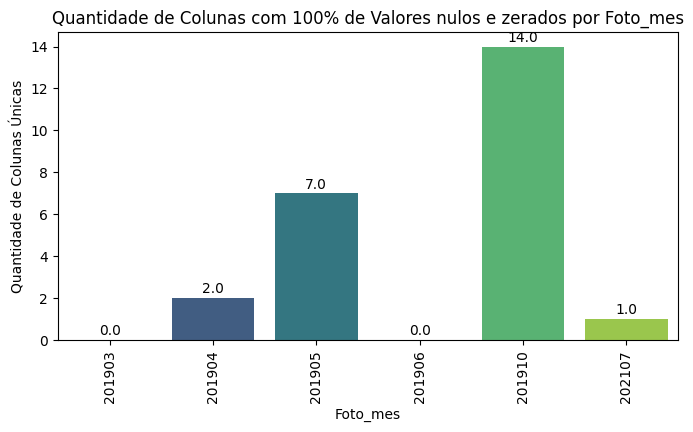

In [66]:

plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos e zerados por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(merged_df['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [67]:
df_parcial_zero = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_parcial_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)

In [68]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)
filtered_columns

numero_de_cliente          False
active_quarter             False
cliente_vip                False
internet                   False
cliente_edad               False
                           ...  
Visa_mconsumototal         False
Visa_cconsumos             False
Visa_cadelantosefectivo    False
Visa_mpagominimo           False
clase_ternaria             False
Length: 154, dtype: bool

In [69]:
df_parcial_zero_filtered = df_parcial_zero.loc[:, filtered_columns]
df_parcial_null_filtered = df_parcial_null.loc[:, filtered_columns]

In [70]:
df_parcial_zero_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_otras,mcomisiones_otras,chomebanking_transacciones,tmobile_app,cmobile_app_trx,Master_madelantodolares
foto_mes,,,,,,,,,,,,,,,,,,,
201903,0.25,0.22,2.54,3.86,1.26,33.24,33.24,95.39,96.01,92.70,93.04,97.80,97.93,2.54,2.54,35.83,0.00,0.00,42.62
201904,0.25,0.22,2.53,4.06,1.22,100.00,100.00,95.62,96.31,91.01,91.43,97.28,97.46,2.53,2.53,40.94,0.00,0.00,42.47
201905,100.00,100.00,100.00,100.00,100.00,33.25,33.25,95.55,96.23,89.42,89.81,96.40,96.57,100.00,100.00,47.70,0.00,0.00,42.10
201906,0.24,0.21,2.75,3.81,1.13,33.32,33.32,94.94,95.92,88.94,89.58,96.55,96.82,2.75,2.75,48.27,0.00,0.00,41.31
201907,0.26,0.23,2.58,4.39,1.07,32.98,32.98,94.84,96.08,89.79,90.69,96.59,96.96,2.58,2.58,43.82,46.88,47.23,41.44
201908,0.29,0.25,2.77,4.48,1.34,33.34,33.34,95.88,96.58,92.55,92.95,97.95,98.14,2.77,2.77,44.31,45.92,46.12,40.83
201909,0.31,0.27,3.38,4.22,1.06,33.56,33.56,96.05,96.59,93.39,93.65,98.12,98.24,3.38,3.38,44.89,45.49,45.82,40.01
201910,100.00,100.00,100.00,100.00,100.00,33.56,33.56,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,44.19,44.50,40.28
202107,0.16,0.14,2.86,4.23,1.15,34.81,34.81,96.52,96.54,93.93,94.33,94.52,94.96,2.86,2.86,15.33,97.63,21.56,42.47


In [71]:
df_parcial_null_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_otras,mcomisiones_otras,chomebanking_transacciones,tmobile_app,cmobile_app_trx,Master_madelantodolares
foto_mes,,,,,,,,,,,,,,,,,,,
201903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.51,0.0,0.25,0.0,0.0,0.0,100.0,100.0,57.36
201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84,0.0,0.32,0.0,0.0,0.0,100.0,100.0,57.51
201905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.83,0.0,0.30,0.0,0.0,0.0,100.0,100.0,57.89
201906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.51,0.0,0.41,0.0,0.0,0.0,100.0,100.0,58.67
201907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.68,0.0,0.59,0.0,0.0,0.0,0.0,0.0,58.55
201908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.54,0.0,0.45,0.0,0.0,0.0,0.0,0.0,59.15
201909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.79,0.0,0.30,0.0,0.0,0.0,0.0,0.0,59.98
201910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,59.70
202107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.65,0.0,2.70,0.0,0.0,0.0,0.0,0.0,57.53


In [81]:
colunas_imputar = df_roto_zero['coluna'].unique()

In [82]:
colunas_imputar

array(['ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras',
       'mtarjeta_master_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_visa_descuentos',
       'mcajeros_propios_descuentos', 'ccajeros_propios_descuentos',
       'chomebanking_transacciones'], dtype=object)

In [83]:
#passar colunas com zero para na
dataset[colunas_imputar] = dataset[colunas_imputar].replace(0, np.nan)

In [84]:
dataset[colunas_imputar].isna().sum()   

ctarjeta_visa_debitos_automaticos      490081
mttarjeta_visa_debitos_automaticos     490081
mrentabilidad                          266552
mrentabilidad_annual                   266254
mcomisiones                            290468
mactivos_margen                        303461
mpasivos_margen                        275296
ccomisiones_otras                      290449
mcomisiones_otras                      290469
mtarjeta_master_descuentos            1185521
ctarjeta_master_descuentos            1175076
mtarjeta_visa_descuentos              1148310
ctarjeta_visa_descuentos              1118545
mcajeros_propios_descuentos           1169330
ccajeros_propios_descuentos           1162260
chomebanking_transacciones             558607
dtype: int64

In [85]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [86]:
dataset_original[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4818336.000,4893028.000,4810103.000,4893028.000,4893028.000,4893028.000,4893028.000
mean,2.373,5461.627,2278.755,25661.771,1141.793,-617.412,1586.546,8.248,1148.173,13.750,0.054,43.414,0.092,16.734,0.064,40.732
std,3.200,11103.566,7067.582,60974.377,2799.223,3351.625,4560.329,7.421,2822.936,274.097,0.464,455.214,0.483,167.108,0.473,72.968
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-555339.210,-125969.940,0.000,-1953482.100,0.000,0.000,0.000,0.000,-246.330,0.000,0.000
25%,0.000,0.000,0.000,2872.870,148.850,-1126.320,150.900,4.000,149.350,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,1149.540,1149.410,14039.100,613.100,-214.760,614.850,8.000,615.170,0.000,0.000,0.000,0.000,0.000,0.000,11.000
75%,3.000,6269.270,2782.950,30420.625,1512.120,0.000,1563.990,11.000,1516.650,0.000,0.000,0.000,0.000,0.000,0.000,55.000
max,75.000,769131.930,2599540.050,11161405.720,1959169.310,568198.100,1799988.850,292.000,1959169.310,124292.830,58.000,118224.210,57.000,53538.070,44.000,10387.000


In [87]:
dataset[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,719008.000,719008.000,942537.000,942835.000,918621.000,905628.000,933793.000,918640.000,918620.000,23568.000,34013.000,60779.000,90544.000,39759.000,46829.000,650482.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,3.328,11167.431,7722.572,60249.580,3332.894,2791.988,5297.022,7.200,3358.322,1781.027,1.108,1726.461,1.241,733.539,2.058,53.739
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,1.000,1342.360,733.130,9461.440,245.540,-964.015,397.910,6.000,245.930,139.213,1.000,164.320,1.000,94.770,1.000,3.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,5.000,8948.260,3474.630,34108.860,1430.190,40.953,2287.710,12.000,1433.723,869.213,2.000,1127.295,2.000,644.815,2.000,21.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [88]:
#dataset sem periodo zerado 
dataset_original[colunas_imputar][(dataset_original['foto_mes'] >= 201904) & (dataset_original['foto_mes'] <= 201909)].describe()


,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,778263.000,781356.000,762866.000,781356.000,781356.000,781356.000,781356.000
mean,2.097,3720.931,2702.307,27916.606,858.277,-347.487,1919.495,8.006,863.862,17.182,0.042,57.386,0.147,16.851,0.094,5.502
std,3.066,7879.545,6650.039,56048.119,2111.626,1913.541,4896.150,7.430,2136.302,284.688,0.307,452.636,0.603,146.915,0.635,18.951
min,0.000,0.000,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,0.000,-53983.240,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,0.000,0.000,112.440,5320.130,42.120,-670.260,99.010,4.000,42.150,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,375.360,1291.600,15565.875,418.710,-77.020,735.810,8.000,419.610,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,3.000,4211.970,2893.020,30490.130,1166.880,0.000,1934.983,12.000,1169.875,0.000,0.000,0.000,0.000,0.000,0.000,5.000
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440,124292.830,19.000,85508.390,27.000,9763.040,41.000,3290.000


* ctarjeta_visa_debitos_automaticos	--	Cantidad de débitos automáticos debitados durante el mes en las tarjeta de crédito VISA
* mtarjeta_visa_debitos_automaticos	pesos	Monto total de  débitos automáticos debitados durante el mes en la tarjeta de crédito VISA . Todo está convertido a pesos argentinos, al valor de la fecha de cierre del utlimo dia habil del mes.
* mrentabilidad	pesos	Ganancia total que ha obtenido el banco de ese cliente, en ese mes.
* mrentabilidad_annual	pesos	Ganancia total que el banco ha obtenido de ese cliente en el ultimo año de relacion cliente-banco,  o meses desde que ingresó si es cliente reciente.
* mcomisiones	pesos	Monto total de las comisiones que ha ganado el banco por ese cliente.
* mactivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido en concepto de intereses que ha cobrado al cliente.
* mpasivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido por el dinero/inversiones que el cliente tiene en el banco.
* ccomisiones_otras	--	Cantidad de otras comisiones que se cobraron al cliente durante el mes.
* mcomisiones_otras	pesos	Monto total en pesos de otras comisiones que se cobraron al cliente durante el mes.


In [89]:
dataset_inputar = dataset_baseline.copy()

In [90]:
dataset_inputar[colunas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos         0
mttarjeta_visa_debitos_automaticos        0
mrentabilidad                             0
mrentabilidad_annual                      0
mcomisiones                               0
mactivos_margen                           0
mpasivos_margen                           0
ccomisiones_otras                         0
mcomisiones_otras                         0
mtarjeta_master_descuentos             7864
ctarjeta_master_descuentos                0
mtarjeta_visa_descuentos              24753
ctarjeta_visa_descuentos                  0
mcajeros_propios_descuentos               0
ccajeros_propios_descuentos               0
chomebanking_transacciones                0
dtype: int64

In [91]:
dataset_inputar[colunas_imputar] = dataset_inputar[colunas_imputar].replace(0, np.nan)

In [92]:
np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)

array(['foto_mes', 'numero_de_cliente',
       'ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras',
       'mtarjeta_master_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_visa_descuentos',
       'mcajeros_propios_descuentos', 'ccajeros_propios_descuentos',
       'chomebanking_transacciones'], dtype=object)

In [93]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


In [95]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


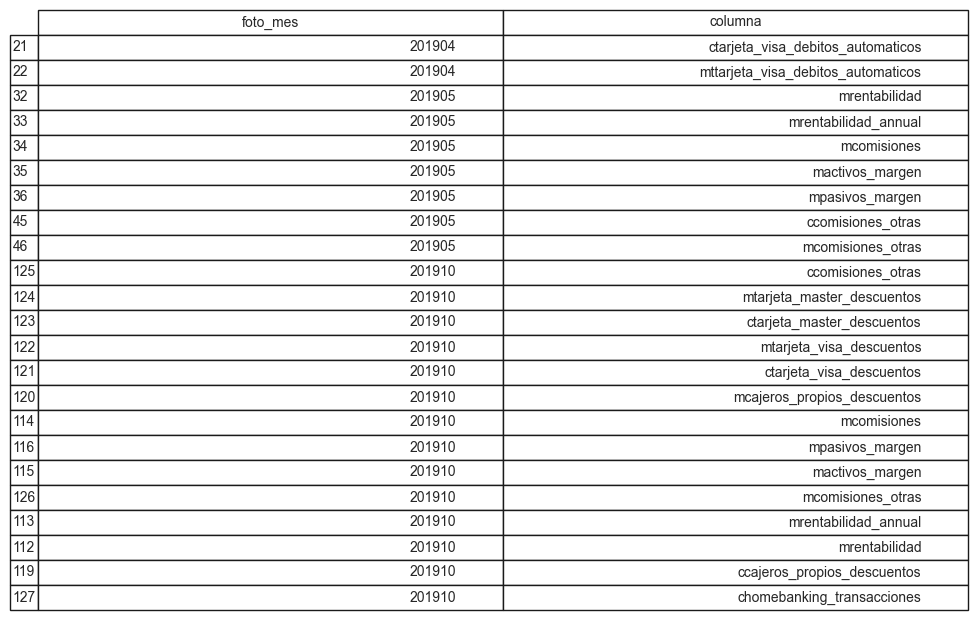

In [102]:
df_selecionado = df_roto_zero.drop(columns='porcentagem')
df_selecionado = df_selecionado.rename(columns={'coluna': 'columna'})

fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, df_selecionado, loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  # Ajusta a escala da tabela

plt.savefig('tabela_exportada.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

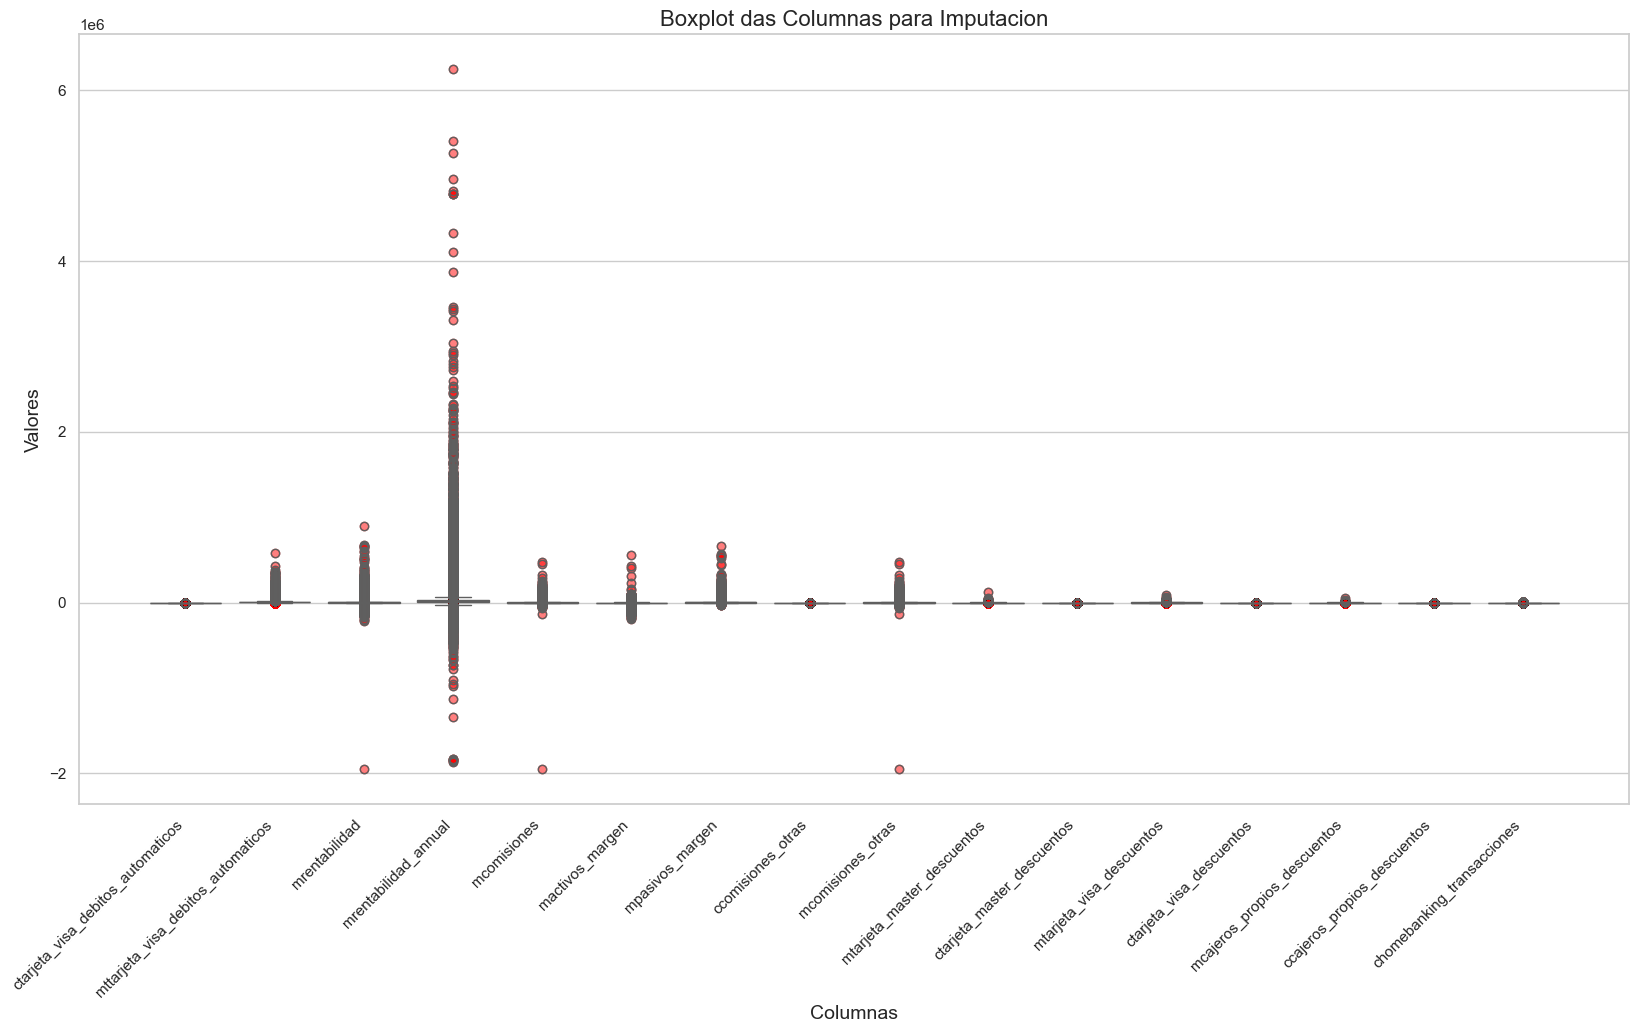

In [103]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=dataset_inputar[colunas_imputar], palette="Set3")

for i in range(len(colunas_imputar)):
    y = dataset_inputar[colunas_imputar[i]]
    x = [i] * len(y)
    ax.scatter(x, y, alpha=0.5, color='red')

plt.title("Boxplot das Columnas para Imputacion", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Valores", fontsize=14)

plt.xticks(range(len(colunas_imputar)), colunas_imputar, rotation=45, ha='right')

plt.show()

In [97]:
#preencher valores nulos com a media
dataset_inputado_media = dataset_inputar.copy()
dataset_inputado_mediana = dataset_inputar.copy()

dataset_inputado_media[colunas_imputar] = dataset_inputar[colunas_imputar].fillna(dataset_inputar[colunas_imputar].mean())
dataset_inputado_mediana[colunas_imputar] = dataset_inputar[colunas_imputar].fillna(dataset_inputar[colunas_imputar].median())

In [98]:
dataset_inputar[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,719008.000,719008.000,942537.000,942835.000,918621.000,905628.000,933793.000,918640.000,918620.000,23568.000,34013.000,60779.000,90544.000,39759.000,46829.000,650482.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,3.328,11167.431,7722.572,60249.580,3332.894,2791.988,5297.022,7.200,3358.322,1781.027,1.108,1726.461,1.241,733.539,2.058,53.739
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,1.000,1342.360,733.130,9461.440,245.540,-964.015,397.910,6.000,245.930,139.213,1.000,164.320,1.000,94.770,1.000,3.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,5.000,8948.260,3474.630,34108.860,1430.190,40.953,2287.710,12.000,1433.723,869.213,2.000,1127.295,2.000,644.815,2.000,21.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [99]:
dataset_inputado_media[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,2.566,8611.739,6818.392,53203.804,2905.096,2416.347,4655.088,6.276,2927.259,248.653,0.186,387.080,0.339,133.017,0.405,39.416
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,2.000,2960.060,1004.430,11792.000,357.340,-658.110,555.580,6.000,357.980,828.316,1.485,942.979,1.576,493.769,2.023,6.000
50%,3.809,7440.161,2491.510,25250.710,1131.060,-538.629,1600.590,9.640,1133.880,828.316,1.485,942.979,1.576,493.769,2.023,25.389
75%,3.809,7440.161,3168.824,31307.869,1171.830,-29.090,2273.642,10.000,1172.830,828.316,1.485,942.979,1.576,493.769,2.023,25.389
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [100]:
dataset_inputado_mediana[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,3.481,5986.565,2848.239,28428.677,1057.786,-471.364,1987.016,9.246,1063.662,417.134,1.014,466.718,1.043,243.857,1.040,16.893
std,2.597,8789.880,6844.990,53478.965,2911.122,2419.140,4684.924,6.315,2933.373,255.322,0.202,402.289,0.372,140.773,0.451,40.468
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,2.000,2960.060,1004.430,11792.000,357.340,-658.110,555.580,6.000,357.980,408.960,1.000,441.510,1.000,235.360,1.000,6.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,3.000,4981.300,2775.180,27837.740,1171.830,-29.090,1759.860,10.000,1172.830,408.960,1.000,441.510,1.000,235.360,1.000,8.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [148]:
#tabla resumen 
tabla_resumen = pd.DataFrame(dataset_inputar[colunas_imputar].mean().round(4))
tabla_resumen = tabla_resumen.rename(columns={0: 'Media_Original'})
tabla_resumen['Mediana_original'] = dataset_inputar[colunas_imputar].median().round(4)
tabla_resumen['Std_original'] = dataset_inputar[colunas_imputar].std().round(4)
tabla_resumen['Media_pos_imputar_media'] = dataset_inputado_media[colunas_imputar].mean().round(4)
tabla_resumen['Mediana_pos_imputar_media'] = dataset_inputado_media[colunas_imputar].median().round(4)
tabla_resumen['Std_pos_imputar_media'] = dataset_inputado_media[colunas_imputar].std().round(4)
tabla_resumen['Media_pos_imputar_mediana'] = dataset_inputado_mediana[colunas_imputar].mean().round(4)
tabla_resumen['Mediana_pos_imputar_mediana'] = dataset_inputado_mediana[colunas_imputar].median().round(4)
tabla_resumen['Std_pos_imputar_mediana'] = dataset_inputado_mediana[colunas_imputar].std().round(4)

In [149]:
tabla_resumen

,Media_Original,Mediana_original,Std_original,Media_pos_imputar_media,Mediana_pos_imputar_media,Std_pos_imputar_media,Media_pos_imputar_mediana,Mediana_pos_imputar_mediana,Std_pos_imputar_mediana
ctarjeta_visa_debitos_automaticos,3.809,3.000,3.328,3.809,3.809,2.566,3.481,3.000,2.597
mttarjeta_visa_debitos_automaticos,7440.161,3853.965,11167.431,7440.161,7440.161,8611.739,5986.565,3853.965,8789.880
mrentabilidad,3168.824,1714.640,7722.572,3168.824,2491.510,6818.392,2848.239,1714.640,6844.990
mrentabilidad_annual,31307.869,18233.140,60249.580,31307.869,25250.710,53203.804,28428.678,18233.140,53478.965
mcomisiones,1163.058,724.860,3332.894,1163.058,1131.060,2905.096,1057.786,724.860,2911.122
mactivos_margen,-538.630,-270.620,2791.988,-538.630,-538.630,2416.347,-471.364,-270.620,2419.140
mpasivos_margen,2273.642,1014.790,5297.022,2273.642,1600.590,4655.088,1987.016,1014.790,4684.924
ccomisiones_otras,9.640,8.000,7.200,9.640,9.640,6.276,9.246,8.000,6.315
mcomisiones_otras,1170.109,727.020,3358.322,1170.109,1133.880,2927.258,1063.662,727.020,2933.373
mtarjeta_master_descuentos,828.316,408.960,1781.027,828.316,828.316,248.653,417.134,408.960,255.322


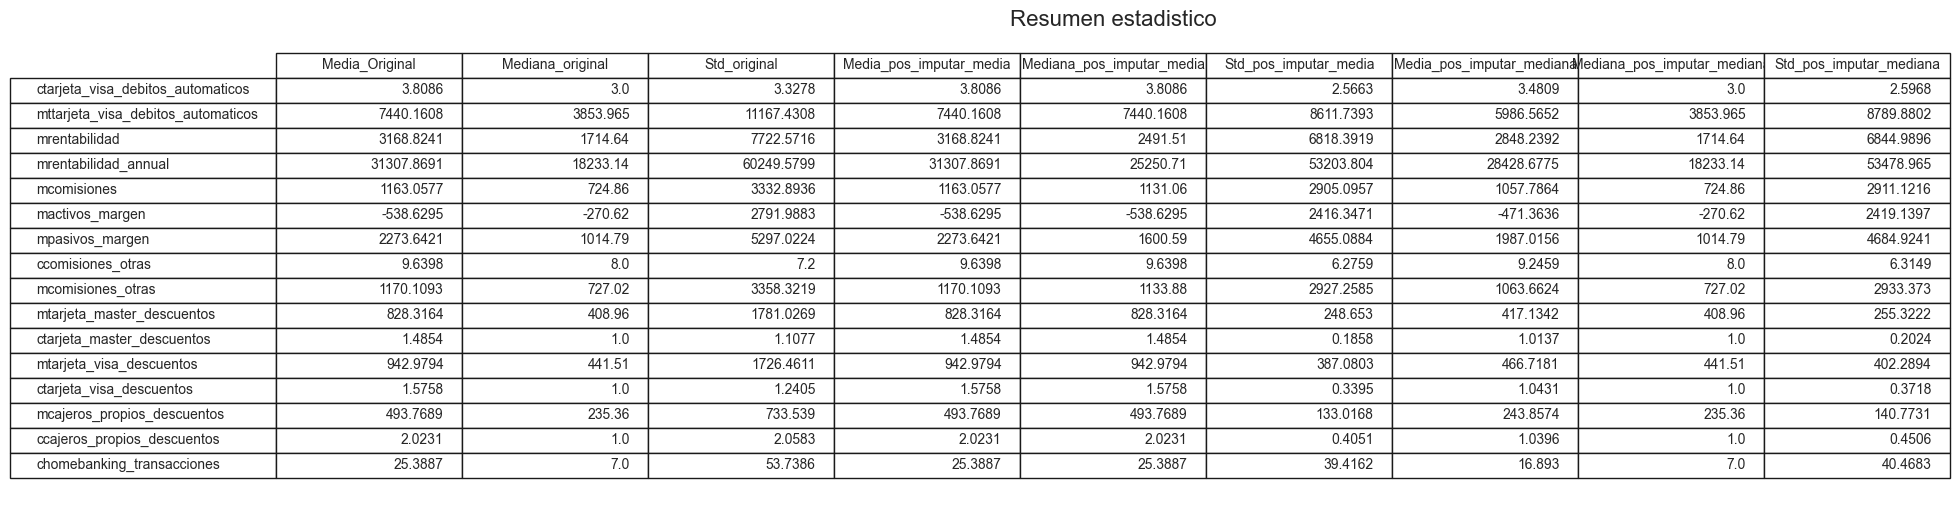

In [151]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axis('off')
tabla = table(ax, tabla_resumen, loc='center', colWidths=[0.2] * len(tabla_resumen.columns))

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.5, 1.5)  # Ajusta a escala da tabela
plt.title("Resumen estadistico", fontsize=16)

plt.savefig('Resumen estadistico.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [172]:
from scipy import stats
import statsmodels.api as sm

In [187]:
dataset_inputar_no_nan = dataset_inputar[colunas_imputar].fillna(0)
dataset_inputar_no_nan[colunas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos     0
mttarjeta_visa_debitos_automaticos    0
mrentabilidad                         0
mrentabilidad_annual                  0
mcomisiones                           0
mactivos_margen                       0
mpasivos_margen                       0
ccomisiones_otras                     0
mcomisiones_otras                     0
mtarjeta_master_descuentos            0
ctarjeta_master_descuentos            0
mtarjeta_visa_descuentos              0
ctarjeta_visa_descuentos              0
mcajeros_propios_descuentos           0
ccajeros_propios_descuentos           0
chomebanking_transacciones            0
dtype: int64

In [190]:
from scipy import stats

# Função para realizar os testes t para cada coluna
def realizar_testes_t(amostra1, amostra2, coluna):
    _, p_value_normality_amostra1 = stats.shapiro(amostra1[coluna])
    _, p_value_homogeneidade_variancia = stats.levene(amostra1[coluna], amostra2[coluna])

    _, p_value_normality_amostra2 = stats.shapiro(amostra2[coluna])

    if all([p > 0.05 for p in [p_value_normality_amostra1, p_value_homogeneidade_variancia, p_value_normality_amostra2]]):
        t_statistic, p_value_ttest = stats.ttest_ind(amostra1[coluna], amostra2[coluna], equal_var=True)
        print(f"Para a coluna '{coluna}':")
        print(f"P-value Shapiro-Wilk para amostra1: {p_value_normality_amostra1}")
        print(f"P-value Levene para homogeneidade de variância: {p_value_homogeneidade_variancia}")
        print(f"P-value Shapiro-Wilk para amostra2: {p_value_normality_amostra2}")
        print(f"P-value do teste t: {p_value_ttest}")
    else:
        print(f"Condições para o teste t não são atendidas para a coluna '{coluna}'.")

# Iterar sobre as colunas e realizar os testes t
for coluna in colunas_imputar:
    realizar_testes_t(dataset_inputar_no_nan, dataset_inputado_mediana, coluna)


C:\Users\maico\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Condições para o teste t não são atendidas para a coluna 'ctarjeta_visa_debitos_automaticos'.
Condições para o teste t não são atendidas para a coluna 'mttarjeta_visa_debitos_automaticos'.
Condições para o teste t não são atendidas para a coluna 'mrentabilidad'.
Condições para o teste t não são atendidas para a coluna 'mrentabilidad_annual'.
Condições para o teste t não são atendidas para a coluna 'mcomisiones'.
Condições para o teste t não são atendidas para a coluna 'mactivos_margen'.
Condições para o teste t não são atendidas para a coluna 'mpasivos_margen'.
Condições para o teste t não são atendidas para a coluna 'ccomisiones_otras'.
Condições para o teste t não são atendidas para a coluna 'mcomisiones_otras'.
Condições para o teste t não são atendidas para a coluna 'mtarjeta_master_descuentos'.
Condições para o teste t não são atendidas para a coluna 'ctarjeta_master_descuentos'.
Condições para o teste t não são atendidas para a coluna 'mtarjeta_visa_descuentos'.
Condições para o 

In [198]:
dataset_inputado_mediana['ctarjeta_visa_debitos_automaticos'].mean()

3.4808636915892874

In [199]:
dataset_inputado_media['ctarjeta_visa_debitos_automaticos'].mean()

3.808623826160485

In [201]:
wilcoxon(dataset_inputado_media['ctarjeta_visa_debitos_automaticos'], dataset_inputado_mediana['ctarjeta_visa_debitos_automaticos'])

WilcoxonResult(statistic=0.0, pvalue=0.0)

In [239]:
from scipy.stats import wilcoxon

# Função para realizar o teste de Wilcoxon para cada coluna
def realizar_teste_wilcoxon(amostra1, amostra2, coluna):
    _, p_value_wilcoxon = wilcoxon(amostra1[coluna], amostra2[coluna])
    print(f"Para a coluna '{coluna}':")
    print(f"P-value do teste de Wilcoxon: {p_value_wilcoxon}")

# Iterar sobre as colunas e realizar o teste de Wilcoxon
for coluna in colunas_imputar:
    realizar_teste_wilcoxon(dataset_inputar_no_nan, dataset_inputado_media, coluna)


Para a coluna 'ctarjeta_visa_debitos_automaticos':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mttarjeta_visa_debitos_automaticos':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mrentabilidad':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mrentabilidad_annual':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mcomisiones':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mactivos_margen':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mpasivos_margen':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'ccomisiones_otras':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mcomisiones_otras':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mtarjeta_master_descuentos':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'ctarjeta_master_descuentos':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mtarjeta_visa_descuentos':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'ctarjeta_visa_descuentos':
P-value do teste de Wilcoxon: 0.0
Para a coluna 'mcajeros_propios_descuentos':
P-va

In [241]:
dataset_inputar_no_nan['ctarjeta_visa_debitos_automaticos'].isna().sum()

0

In [242]:
dataset_inputado_media['ctarjeta_visa_debitos_automaticos'].isna().sum()

0

In [245]:
wilcoxon(dataset_inputado_media['ctarjeta_visa_debitos_automaticos'], dataset_inputado_mediana['ctarjeta_visa_debitos_automaticos'])


WilcoxonResult(statistic=0.0, pvalue=0.0)

In [ ]:
#gravar datasets em csv
dataset_inputar.to_csv('../datos/dataset_sem_inputar.csv.gz', index=False)

In [ ]:
dataset_inputado_media.to_csv('../datos/dataset_inputado_media.csv.gz', index=False)

In [ ]:
dataset_inputado_mediana.to_csv('../datos/dataset_inputado_mediana.csv.gz', index=False)